# 0. EDA Process

**1. 1차원데이터분석**

**1.** **변수종류파악( 수치형/ 범주형/ 시간형)**

**2.** **변수종류별분석지표( 수치형/ 범주형/ 시간형)**

**3.** **시각화**

- **도수분포표/ 히스토그램/ 상자그림**

**2. 2차원데이터분석**

**1.** **공분산/ 상관계수**

**2.** **다중공선성확인**

**3.** **시각화**

- **산점도/ 회귀직선/ 히트맵**

# 항공사 지연요인 데이터 탐색적 분석
출처: https://www.kaggle.com/datasets/pitterman/airline-stats
- airline :  항공사
- carrier_deay : 항공사 요인
- atc_delay : ATC 항공교통관제 지연 요인
- weather_delay : 날씨로 인한 지연 요인

- 범주형 : airline
- 수치형 : carrier_delay, atc_delay, weather_delay

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('대웅_example/판다스입문_codes/data/airline_stats.csv')
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [21]:
df['airline'].unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [23]:
# 총 6개 항공사의 데이터를 포함하고 있다.
# 그 중 Delta가 9107건으로 가장 많고 American,Southwest, United 항공사가 5천건 수준이다.
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

## 2. 수치형  변수의 통계량 확인

In [28]:
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [42]:
# 항공사별 기술통계량 확인
df.groupby('airline').describe().T

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

항공사 요인의 경우, American이 평균 9.04%, Jet Blue 8.08%순이다.
표준편차가  가장 큰 항공사는 United다.

In [34]:
df.groupby('airline')['pct_carrier_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Alaska,3851.0,3.521889,2.483224,0.0,1.935484,3.225806,4.685599,22.290323
American,5723.0,9.042180,4.139067,0.0,6.338538,8.428571,10.988763,50.000000
Delta,9095.0,6.333460,4.695292,0.0,3.813989,5.548387,7.821952,100.000000
Jet Blue,3773.0,8.081843,3.797737,0.0,5.341176,7.657895,10.280000,28.000000
Southwest,5584.0,7.521997,3.345085,0.0,5.070294,6.960930,9.354839,24.800000
United,5414.0,7.398833,5.369283,0.0,4.034708,6.445210,9.633110,100.000000


## 3. 결측치 확인

각 변수별로 28건의 결측치가 확인됨

In [49]:
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

## 4. 시각적 분석

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

항공사 지연 요인은 첫번째 구간이 12천, 두번째 구간이 15천이다.<br>
ATC 지연 요인은 첫번째 구간이 2만으로 가장 높다. <BR>
날씨 지연 요인은 첫번째 구간이 3만으로 가장 높다.

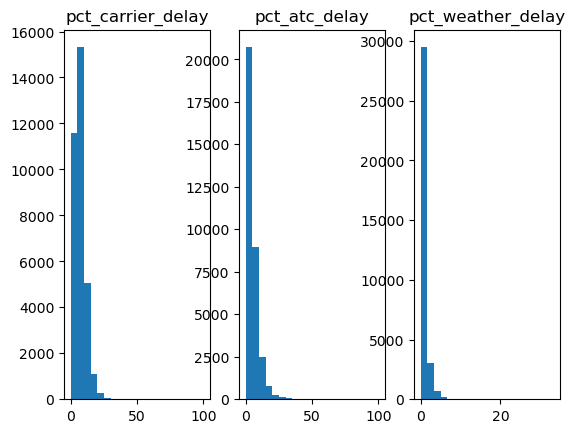

In [76]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df['pct_carrier_delay'], bins = 20)
ax2.hist(df['pct_atc_delay'], bins = 20)
ax3.hist(df['pct_weather_delay'], bins = 20)

ax1.set_title('pct_carrier_delay')
ax2.set_title('pct_atc_delay')
ax3.set_title('pct_weather_delay')

plt.show()

지연 유형별 중앙값, 사분위수, 이상치를 확인

1) 항공사 지연 : 20% 이상인 경우를 이상치로 판단, 그런데 100에 육박하는 극단적인 지연율도 있다.
2) ATC 지연 : 항공사 지연보다 낮은 수준에서 이상치로 판단, 역시 100인 극단적인도 지연도 있으나 항공사 지연보다 빈번하지 않다.
3) 날씨 지연 : 중앙값, IQR 자체가 작다. 이상치가 20이상인 경우고, 다른 요인들에 비해 상대적으로 빈번하지 않다.

<Axes: >

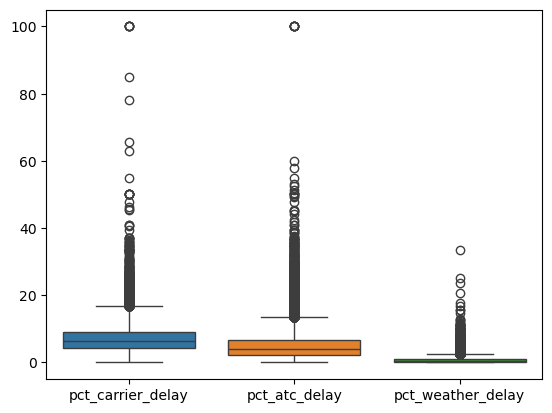

In [89]:
sns.boxplot(data=df)

항공사 지연요인을<BR>

Delta, United 항공사가 중앙값은 다른 항공사에 비해 크지 않다. 그러나 이상치가 많이 보인다.<br>
Alaska가 전반적으로 발생율이 낮은 편이다.

Text(0, 0.5, 'pct_atc_delay')

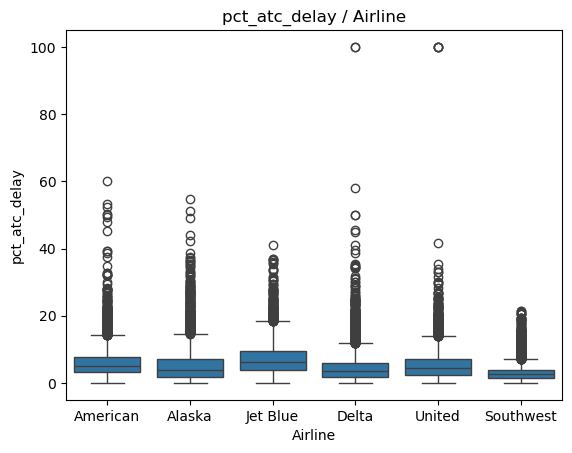

In [94]:
# 항공사 별로 boxplot, 항공사별 요인
sns.boxplot(data=df, x='airline', y='pct_atc_delay')

plt.title('pct_atc_delay / Airline')
plt.xlabel('Airline')
plt.ylabel('pct_atc_delay')

Text(0, 0.5, 'Carrier Delay')

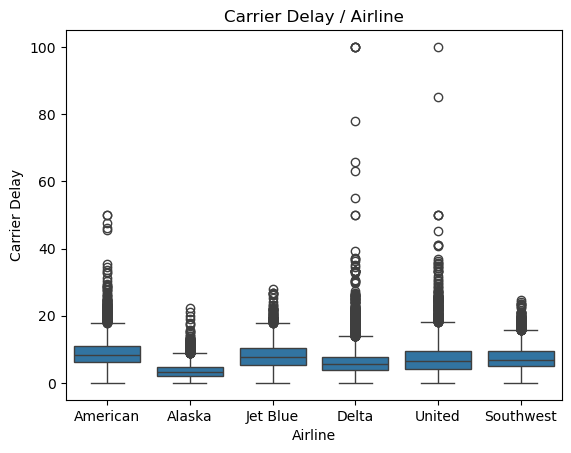

In [98]:
# 항공사 별로 boxplot, 항공사별 요인
sns.boxplot(data=df, x='airline', y='pct_carrier_delay')

plt.title('Carrier Delay / Airline')
plt.xlabel('Airline')
plt.ylabel('Carrier Delay')

Text(0, 0.5, 'weather_delay')

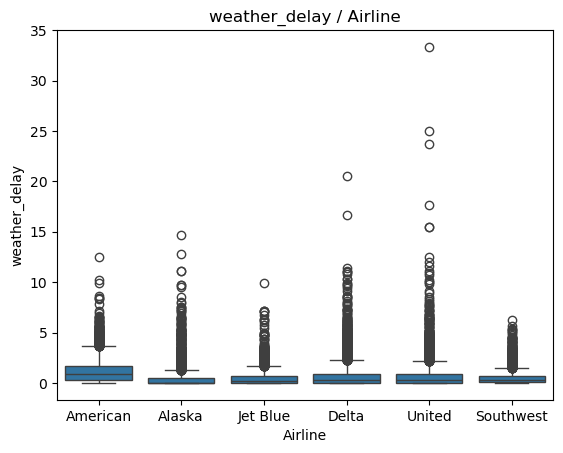

In [100]:
# 항공사 별로 boxplot
sns.boxplot(data=df, x='airline', y='pct_weather_delay')

plt.title('weather_delay / Airline')
plt.xlabel('Airline')
plt.ylabel('weather_delay')

Text(0, 0.5, 'weather_delay')

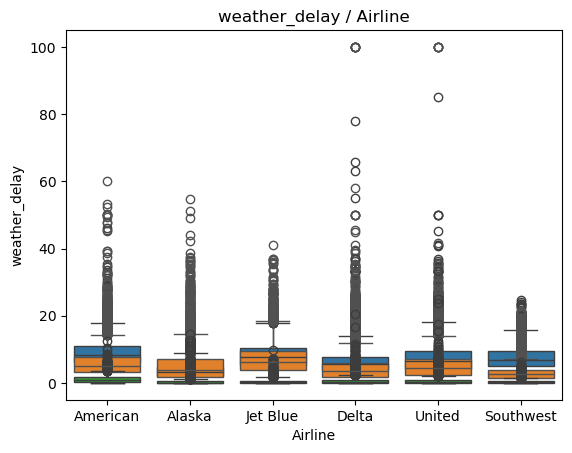

In [87]:
# 항공사 별로 boxplot
sns.boxplot(data=df, x='airline', y='pct_carrier_delay')
plt.title('Carrier Delay / Airline')
plt.xlabel('Airline')
plt.ylabel('Carrier Delay')

sns.boxplot(data=df, x='airline', y='pct_atc_delay')
plt.title('atc_delay / Airline')
plt.xlabel('Airline')
plt.ylabel('atc_delay')

sns.boxplot(data=df, x='airline', y='pct_weather_delay')
plt.title('weather_delay / Airline')
plt.xlabel('Airline')
plt.ylabel('weather_delay')


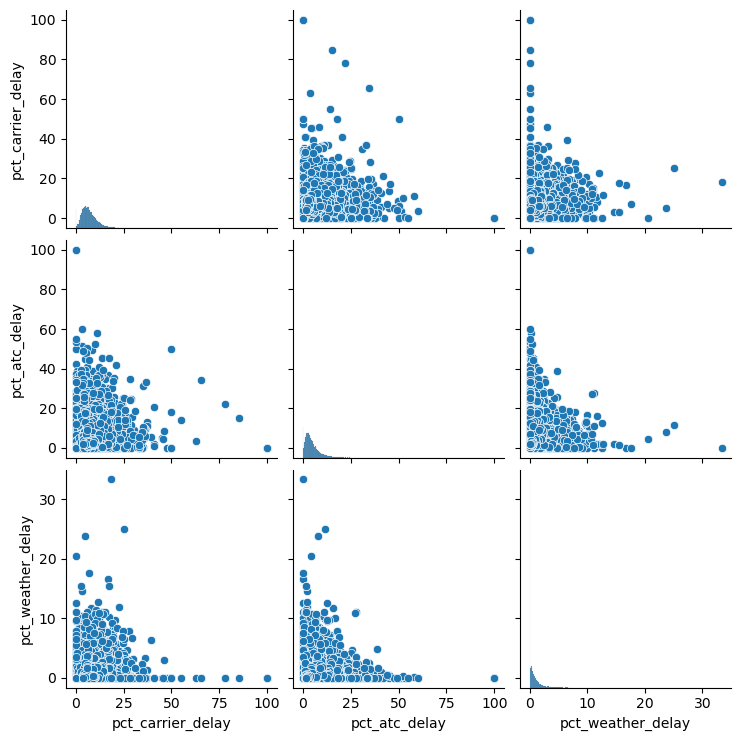

In [115]:
# 산점도(scatter)
sns.pairplot(df)

1. 항공사 요인 vs ATC 요인 간 상관계수가 0.14로, 약한 상관관계인 것을 알 수 있다.
2. 항공사 요인 VS  날씨 요인 간 상관계수가 0.16으로, 약한 상관관계인 것을 알 수 있다.<BR>
이것은 항공사 지연이 발생했을 때 기상 지연도 발생할 수 있다는 것을 의미하지만, 상당부분 두 지연 요인은 독립적으로 발생하는 것으로 보인다(상관관계가 크기 않다는 점).
3. ATC 요인 VS 날씨 요인은 상관계수가 0.092로 거의 상관이 없다고 볼 수 있다. 서로 독립적으로 발생하는 경향이 있음을 의미한다.

In [110]:
# 상관관계
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


<Axes: >

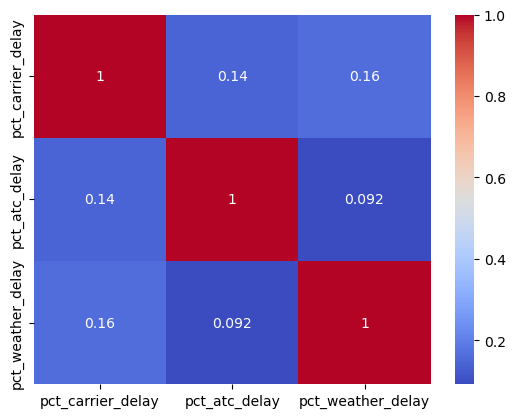

In [112]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# 5. 결측치 처리

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [121]:
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

In [125]:
df_cleanned = df.dropna()
df_cleanned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33440 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33440 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [127]:
# 결측치가 제거된 데이터로 시각적 분석, 상관관계 분석
corr_matrix1 = df_cleanned.corr(numeric_only=True)
corr_matrix1

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


<Axes: >

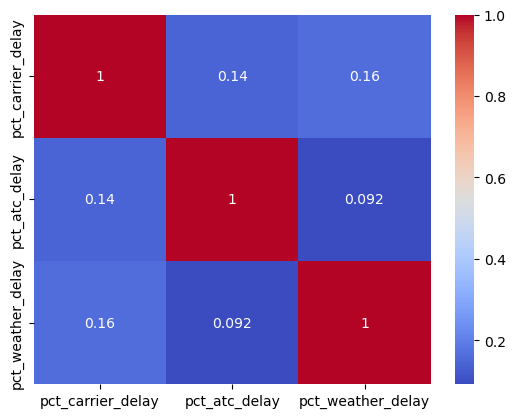

In [129]:
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')